# Implementação do modelo convolucional

Implementar modelo convolucional para predição de subidas.

Problema: De acordo com as 10 últimos valores de fechamento, o próximo valor irá subir ou descer?

Entradas: close das 10 ultimas operações

Saída: Subiu

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_frame = pd.read_csv("../datasets/WINN_M1.csv",sep='\t')

In [4]:
from torch.utils.data import Dataset 

In [5]:
data_frame.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2020.10.15,11:49:00,98565,98575,98530,98575,2373,9001,5
1,2020.10.15,11:50:00,98570,98625,98570,98600,5483,19111,5
2,2020.10.15,11:51:00,98595,98600,98535,98580,4572,17663,5
3,2020.10.15,11:52:00,98575,98620,98535,98615,3536,13143,5
4,2020.10.15,11:53:00,98620,98625,98575,98610,3729,13702,5


In [34]:
data_frame.loc[lambda data_frame1: (data_frame['<OPEN>'] - data_frame['<CLOSE>']) > 10, "Subiu"] = 0
data_frame.loc[lambda data_frame1: (data_frame['<CLOSE>'] - data_frame['<OPEN>']) > 10, "Subiu"] = 1
data_frame.loc[lambda data_frame1: ((data_frame['<OPEN>'] >= data_frame['<CLOSE>'] - 10) & (data_frame['<OPEN>'] <= (data_frame['<CLOSE>'] + 10))), "Subiu"] = 2
data_frame.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,Subiu
0,2020.10.15,11:49:00,98565,98575,98530,98575,2373,9001,5,2.0
1,2020.10.15,11:50:00,98570,98625,98570,98600,5483,19111,5,1.0
2,2020.10.15,11:51:00,98595,98600,98535,98580,4572,17663,5,0.0
3,2020.10.15,11:52:00,98575,98620,98535,98615,3536,13143,5,1.0
4,2020.10.15,11:53:00,98620,98625,98575,98610,3729,13702,5,2.0


In [37]:
data_frame.loc[lambda data_frame: data_frame['Subiu'] == 1]

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,Subiu
1,2020.10.15,11:50:00,98570,98625,98570,98600,5483,19111,5,1.0
3,2020.10.15,11:52:00,98575,98620,98535,98615,3536,13143,5,1.0
5,2020.10.15,11:54:00,98610,98655,98590,98655,5040,17128,5,1.0
7,2020.10.15,11:56:00,98615,98675,98585,98660,5008,17128,5,1.0
10,2020.10.15,11:59:00,98655,98685,98630,98670,2799,10529,5,1.0
...,...,...,...,...,...,...,...,...,...,...
171013,2022.02.07,18:01:00,112215,112305,112185,112275,1593,24303,0,1.0
171019,2022.02.07,18:07:00,112170,112190,112160,112185,680,5548,0,1.0
171023,2022.02.07,18:11:00,112170,112250,112160,112230,1262,17338,0,1.0
171031,2022.02.07,18:19:00,112200,112260,112180,112235,894,10658,0,1.0


In [38]:
a = pd.DataFrame()

for x in range(0, data_frame.shape[0] - 10, 10):
  b = pd.DataFrame(data_frame.loc[x:(x+9), '<CLOSE>'])
  b = b.reset_index()
  b = b.drop(['index'], axis=1)
  a = pd.concat([a,b.T])

alpha = [data_frame.loc[x, 'Subiu'] for x in range(10, data_frame.shape[0], 10)]
a = (a.T / a.T.max()).T

a['label'] = alpha

In [39]:
a = a.reset_index()
a = a.drop(['index'],axis= 1)

In [40]:
a.head()

,0,1,2,3,4,5,6,7,8,9,label
0,0.999138,0.999392,0.999189,0.999544,0.999493,0.999949,0.999544,1.000000,1.000000,0.999949,1.0
1,0.996566,0.996516,0.997980,0.997829,0.997879,0.998031,0.998283,0.998990,0.999647,1.000000,0.0
2,1.000000,0.999545,0.999495,0.999394,0.998838,0.998737,0.999040,0.998838,0.999192,0.999343,0.0
3,0.998888,0.998838,0.999141,0.999444,0.999495,0.999848,1.000000,0.999949,0.999596,0.999444,2.0
4,0.999293,0.999747,0.999596,1.000000,0.999798,0.999848,0.999798,0.999798,1.000000,0.999646,2.0


In [41]:
a.loc[lambda a: a['label'] == 2]

,0,1,2,3,4,5,6,7,8,9,label
3,0.998888,0.998838,0.999141,0.999444,0.999495,0.999848,1.000000,0.999949,0.999596,0.999444,2.0
4,0.999293,0.999747,0.999596,1.000000,0.999798,0.999848,0.999798,0.999798,1.000000,0.999646,2.0
6,0.998588,0.999496,0.998941,0.999798,0.999697,0.999647,1.000000,0.999395,0.999546,0.999294,2.0
7,1.000000,0.999495,0.999445,0.999344,0.999344,0.999495,0.999293,0.999495,0.999243,0.999041,2.0
10,0.999190,0.999595,1.000000,0.999545,0.999393,0.998280,0.998786,0.998988,0.999190,0.999292,2.0
...,...,...,...,...,...,...,...,...,...,...,...
17090,0.999644,0.999378,0.999289,0.999244,0.999511,0.999422,0.999600,0.999644,0.999911,1.000000,2.0
17091,0.999822,0.999644,0.999422,0.999511,0.999378,0.999244,0.999511,0.999689,0.999867,1.000000,2.0
17095,0.999822,0.999956,0.999378,0.999645,0.999556,0.999556,1.000000,0.999867,0.999911,0.999689,2.0
17096,0.999067,0.999156,0.999245,0.999645,1.000000,0.999822,0.999956,0.999822,0.999689,0.999689,2.0


In [42]:
a = a.drop(a.loc[lambda a: a['label'] == 2].index,axis= 0)
a = a.reset_index()
a = a.drop(['index'],axis= 1)

In [43]:
a

,0,1,2,3,4,5,6,7,8,9,label
0,0.999138,0.999392,0.999189,0.999544,0.999493,0.999949,0.999544,1.000000,1.000000,0.999949,1.0
1,0.996566,0.996516,0.997980,0.997829,0.997879,0.998031,0.998283,0.998990,0.999647,1.000000,0.0
2,1.000000,0.999545,0.999495,0.999394,0.998838,0.998737,0.999040,0.998838,0.999192,0.999343,0.0
3,0.999444,0.999646,0.999697,0.999848,0.999646,0.999495,1.000000,1.000000,0.999747,0.999444,1.0
4,1.000000,0.999646,0.999697,0.999697,0.999798,0.999545,0.999343,0.999596,0.999646,0.999596,0.0
...,...,...,...,...,...,...,...,...,...,...,...
12828,0.999689,0.999512,0.999467,0.999822,0.999734,0.999867,0.999734,0.999734,1.000000,0.999645,0.0
12829,0.999511,0.999378,0.999600,0.999689,0.999511,0.999733,0.999822,0.999911,1.000000,1.000000,0.0
12830,0.999555,0.999600,0.999155,0.999600,1.000000,0.999867,0.999333,0.998932,0.998932,0.999511,0.0
12831,0.999199,0.999110,1.000000,0.999600,0.998977,0.998176,0.997998,0.998132,0.997998,0.998176,1.0


In [44]:
class DadosFinanceiros(Dataset):
    def __init__(self, dataframe):
        self.tabela = dataframe
        self.x = torch.tensor(self.tabela.iloc[:, :-1].values, dtype= torch.float32)
        self.y = torch.tensor(self.tabela['label'].values, dtype= torch.float32)

    def __len__(self):
      return len(self.x)

    def __getitem__(self, index):
      return self.x[index], self.y[index]

In [45]:
# Criar dataset
operacoes = DadosFinanceiros(a)

In [46]:
# Dividir treino e teste
tamanho_treino = int(0.7*len(operacoes))
tamanho_validacao = int(0.1*len(operacoes))
tamanho_teste = len(operacoes)-tamanho_treino-tamanho_validacao

ds_treino, ds_validacao, ds_teste = torch.utils.data.random_split(operacoes, [tamanho_treino,
                                                                               tamanho_validacao,
                                                                               tamanho_teste])

In [47]:
# Fazer dataloader
batch_size = 30

loader_treino = torch.utils.data.DataLoader(ds_treino, batch_size= batch_size,
                                            shuffle= True)
loader_validacao = torch.utils.data.DataLoader(ds_validacao, batch_size= batch_size,
                                            shuffle= True)
loader_teste = torch.utils.data.DataLoader(ds_teste, batch_size= batch_size,
                                            shuffle= False)

In [48]:
dataiter = iter(loader_treino)
dados, labels = dataiter.next()

print(dados, labels)
print(dados.shape)

tensor([[1.0000, 0.9999, 0.9995, 0.9998, 0.9998, 0.9996, 0.9994, 0.9996, 0.9997,
         0.9997],
        [0.9998, 1.0000, 0.9995, 1.0000, 1.0000, 0.9992, 0.9993, 0.9991, 0.9993,
         0.9994],
        [0.9987, 0.9987, 0.9983, 0.9982, 0.9992, 0.9996, 0.9983, 0.9990, 1.0000,
         0.9998],
        [0.9992, 0.9993, 0.9998, 1.0000, 0.9987, 0.9995, 0.9998, 0.9991, 0.9987,
         0.9989],
        [0.9985, 0.9984, 0.9983, 0.9980, 0.9984, 0.9995, 0.9993, 0.9997, 0.9997,
         1.0000],
        [1.0000, 0.9998, 0.9996, 0.9997, 0.9998, 0.9998, 0.9998, 1.0000, 0.9999,
         0.9999],
        [0.9947, 0.9960, 0.9972, 0.9973, 0.9981, 0.9991, 1.0000, 0.9994, 0.9980,
         0.9985],
        [0.9989, 0.9989, 0.9997, 0.9998, 0.9995, 0.9993, 0.9991, 0.9995, 1.0000,
         0.9999],
        [0.9992, 0.9994, 0.9996, 0.9994, 0.9996, 0.9996, 0.9997, 0.9999, 1.0000,
         0.9995],
        [0.9985, 0.9982, 0.9983, 0.9989, 0.9980, 0.9984, 0.9987, 0.9990, 0.9989,
         1.0000],
        [0

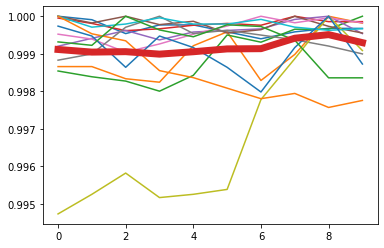

In [49]:
plt.plot(dados[labels==0,:].T);
plt.plot(dados[labels==0,:].T.mean(axis=1),linewidth=7);

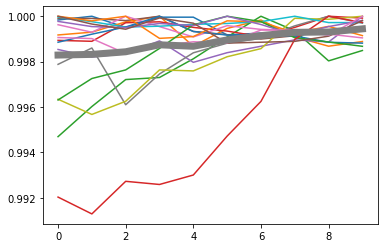

In [50]:
plt.plot(dados[labels==1,:].T);
plt.plot(dados[labels==1,:].T.mean(axis=1),linewidth=7);

In [51]:
from torch import nn
import torch.nn.functional as F

In [52]:
tem_gpu = torch.cuda.is_available()

if not tem_gpu:
  print("Treinaremos na CPU")
else:
  print("Treinaremos da GPU")

Treinaremos na CPU


In [53]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Entrada de um vetor de 10 dados 
        self.conv1 = nn.Conv1d(1, 5, 3, padding=1)
        # Entrada de um vetor de 10x5
        self.conv2 = nn.Conv1d(5, 10, 3, padding=1)
        # Entrada de  um vetor de 10x10
        self.conv3 = nn.Conv1d(10, 15, 5, padding=2)
        # Saída de um vetor de 10x15

        # MaxPool
        self.pool = nn.MaxPool1d(2, stride= 2)

        # linear layer (10*30 -> 30)
        self.fc1 = nn.Linear(30, 30)
        # linear layer (30 -> 10)
        self.fc2 = nn.Linear(30, 10)
        # linear layer (10 -> 1)
        self.fc3 = nn.Linear(10, 1)


    def forward(self, x):
        # Muda o shape da convolução 1D
        x = x.view(len(x),1,-1)

        # add sequence of convolutional and max pooling layers
        x = self.pool(F.leaky_relu(self.conv1(x)))
        x = self.pool(F.leaky_relu(self.conv2(x)))
        x = F.leaky_relu(self.conv3(x))
        
        # flatten image input
        x = x.view(x.size(0), -1)


        # FC com leaky_relu
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))

        return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if tem_gpu:
    model.cuda()

Net(
  (conv1): Conv1d(1, 5, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(5, 10, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv3): Conv1d(10, 15, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=30, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
)


In [54]:
lr = 0.001

criterion = nn.BCELoss()

optmizer = torch.optim.SGD(model.parameters(), lr= lr)


In [55]:
def train_model(nEpochs = 60):
    train_loss_list =[]
    valid_loss_list = []

    valid_loss_min = np.Inf # Minimo valid loss

    for epoch in range(nEpochs):
        train_loss= 0
        validation_loss= 0

        model.train()
        for sample, target in loader_treino:
            if tem_gpu:
                sample, target = sample.cuda(), target.cuda()

            target = target.unsqueeze(1)
        # Zerar o gradiente
            optmizer.zero_grad()
        # Gera saída do modelo
            outputs = model(sample)
        # Calcula o erro
            loss = criterion(outputs, target)
            train_loss+=loss.item()*sample.size(0)
        # Calcula os gradientes
            loss.backward()
        # Otimiza o modelo
            optmizer.step()
            
        model.eval()
        for data, target in loader_validacao:
            # move tensors to GPU if CUDA is available
            if tem_gpu:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            target = target.unsqueeze(1)
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            validation_loss += loss.item()*data.size(0)

        train_loss = train_loss/len(loader_treino.dataset)
        train_loss_list.append(train_loss)
        
        validation_loss = validation_loss/len(loader_treino.dataset)
        valid_loss_list.append(validation_loss)
      
        if (not epoch%5):
            print(f"Época: {epoch} \nLoss Treino: {train_loss}")
            print(f"Loss validação: {validation_loss}")

        if validation_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min, validation_loss))
            torch.save(model.state_dict(), 'modelo1.pt')
            valid_loss_min = validation_loss

    return train_loss_list, valid_loss_list

In [56]:
trained_data, validated_data = train_model(100)

Época: 0 
Loss Treino: 0.6962429451661108
Loss validação: 0.09967146425540206
Validation loss decreased (inf --> 0.099671).  Saving model ...
Validation loss decreased (0.099671 --> 0.099552).  Saving model ...
Validation loss decreased (0.099552 --> 0.099453).  Saving model ...
Validation loss decreased (0.099453 --> 0.099374).  Saving model ...
Validation loss decreased (0.099374 --> 0.099309).  Saving model ...
Época: 5 
Loss Treino: 0.6940136656760638
Loss validação: 0.09925710820520056
Validation loss decreased (0.099309 --> 0.099257).  Saving model ...
Validation loss decreased (0.099257 --> 0.099215).  Saving model ...
Validation loss decreased (0.099215 --> 0.099179).  Saving model ...
Validation loss decreased (0.099179 --> 0.099150).  Saving model ...
Validation loss decreased (0.099150 --> 0.099126).  Saving model ...
Época: 10 
Loss Treino: 0.6933892505027982
Loss validação: 0.09910725389386317
Validation loss decreased (0.099126 --> 0.099107).  Saving model ...
Validation 

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
def createCM(loader,model,nClasses):
  model.eval()

  accuracy = 0
  CM = np.zeros((nClasses,nClasses))
  y_pred = []
  y_true = []

  for sample1, target1 in loader:

    if tem_gpu:
      sample1, target1 = sample1.cuda(), target1.cuda()
      model.cuda()

    prediction = model(sample1)
    outputsClass = torch.argmax(prediction, dim=1)

    if tem_gpu:
      yt = np.array([t.cpu().numpy() for t in outputsClass])
      yp = np.array([t.cpu().numpy() for t in target1])

    else:
      yt = np.array([t.numpy() for t in outputsClass])
      yp = np.array([t.numpy() for t in target1])
      
    for x in range(len(yp)):
      y_pred.append(yp.item(x))
    for x in range(len(yt)):
      y_true.append(yt.item(x))

  CM = confusion_matrix(y_true, y_pred)
  accuracy = accuracy_score(y_true, y_pred)
  return CM, accuracy

In [ ]:
matriz, acuracia = createCM(loader_teste,model,2)
matriz

array([[1612, 1636],
       [   0,    0]])

In [ ]:
acuracia

0.4963054187192118

Não reconhece padrão